<hr style="width:100%;height:3px;border-width:0;background-color:silver">
<h1 style="text-align:center">   
      <font color = MidnightBlue >
                Fake News Detection with NLP and ML 
        </font>    
</h1>   
<hr style="width:100%;height:3px;border-width:0;background-color:silver">
<center><img style = "height:550px;" src="https://images.livemint.com/rf/Image-621x414/LiveMint/Period2/2018/05/05/Photos/Processed/fakereal-k2QC--621x414@LiveMint.jpg"></center>
<br>
<h2><font color = MidnightBlue>What is "Fake News"?</font></h2>
<p>“Fake news” is a term that has come to mean different things to different people. At its core, we are defining “fake news” as those news stories that are false: the story itself is fabricated, with no verifiable facts, sources or quotes. Sometimes these stories may be propaganda that is intentionally designed to mislead the reader, or may be designed as “clickbait” written for economic incentives (the writer profits on the number of people who click on the story). In recent years, fake news stories have proliferated via social media, in part because they are so easily and quickly shared online.</p>
<h2><font color = MidnightBlue>About Dataset</font></h2>
<p>This data set consists of 40000 fake and real news. Our goal is to train our model to accurately predict whether a particular piece of news is real or fake. Fake and real news data are given in two separate data sets, with each data set consisting of approximately 20000 articles.</p>
<br>

<a id = 1></a>
<h1><font color = MidnightBlue>Import Libraries</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

import warnings
warnings.filterwarnings('ignore')



<a id = 2></a>
<h1><font color = MidnightBlue>Load and Check Data</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

In [2]:
real_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [3]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
#add column 
real_data['target'] = 1
fake_data['target'] = 0 

In [6]:
#Merging the 2 datasets
data = pd.concat([real_data, fake_data], ignore_index=True, sort=False)
data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

<a id = 3></a>
<h1><font color = MidnightBlue>Visualization</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

**1.Count of Fake and Real Data**

0    23481
1    21417
Name: target, dtype: int64


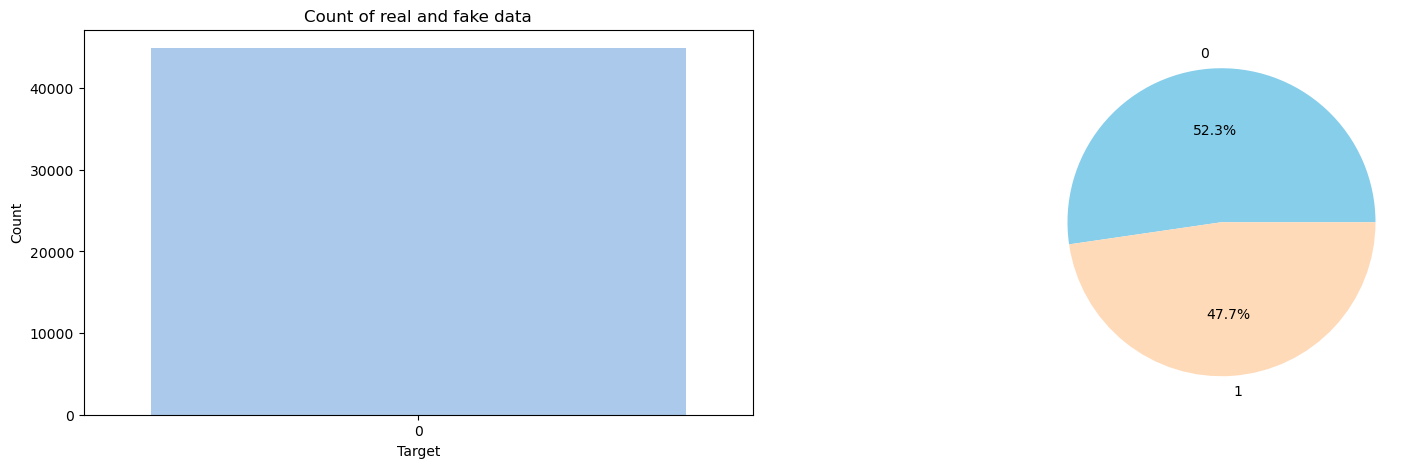

In [8]:
print(data["target"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(data.target,ax=ax[0],palette="pastel");
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("Target")
g2 = plt.pie(data["target"].value_counts().values,explode=[0,0],labels=data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

**2.Distribution of The Subject According to Real and Fake Data**

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

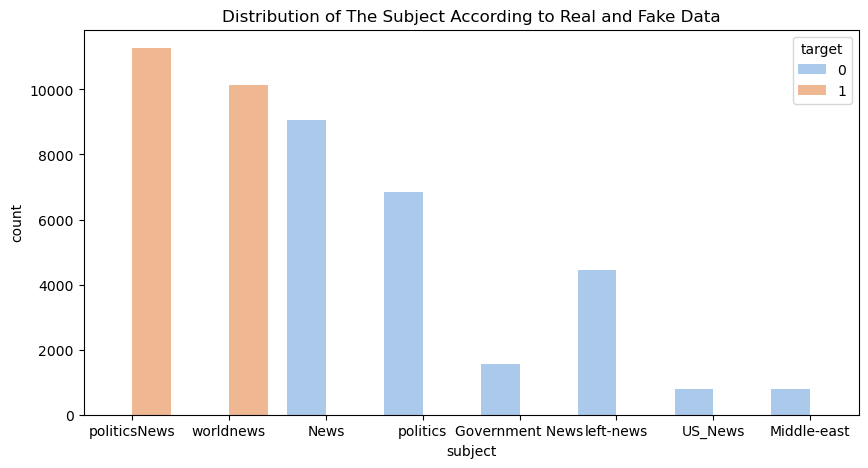

In [9]:
print(data.subject.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="subject",  hue='target', data=data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

# Concate Columns

In [10]:
data['text'] = data['date'] + " " + data['subject'] + " " + data['title'] + " " + data['text']
data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...","December 31, 2017 politicsNews As U.S. budget...",politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,"December 29, 2017 politicsNews U.S. military ...",politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,"December 31, 2017 politicsNews Senior U.S. Re...",politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,"December 30, 2017 politicsNews FBI Russia pro...",politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,"December 29, 2017 politicsNews Trump wants Po...",politicsNews,"December 29, 2017",1


# Removal Unuseful Columns

In [11]:
del data['title']
del data['subject']
del data['date']
data.head()

,text,target
0,"December 31, 2017 politicsNews As U.S. budget...",1
1,"December 29, 2017 politicsNews U.S. military ...",1
2,"December 31, 2017 politicsNews Senior U.S. Re...",1
3,"December 30, 2017 politicsNews FBI Russia pro...",1
4,"December 29, 2017 politicsNews Trump wants Po...",1


In [12]:
first_text = data.text[0]
first_text

'December 31, 2017  politicsNews As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also wan

In [13]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head()
data.shape

(44898, 2)

# Convert to Lowercase

In [14]:
data['text'] = data['text'].str.lower()
data.head()

,text,target
3588,"may 24, 2017 politicsnews on trip abroad, tru...",1
18272,"october 5, 2017 worldnews after speech fiasco...",1
42324,"mar 8, 2016 left-news shocking number of michi...",0
25116,"november 23, 2016 news watch: wolf blitzer ma...",0
16364,"october 26, 2017 worldnews catalonia's leader...",1


In [15]:
first_text = data.text[0]
first_text

'december 31, 2017  politicsnews as u.s. budget fight looms, republicans flip their fiscal script washington (reuters) - the head of a conservative republican faction in the u.s. congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on sunday and urged budget restraint in 2018. in keeping with a sharp pivot under way among republicans, u.s. representative mark meadows, speaking on cbs’ “face the nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in january. when they return from the holidays on wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the november congressional election campaigns approach in which republicans will seek to keep control of congress. president donald trump and his republicans want a big budget increase in military spending, while democrats also wan

# Removal of Punctuations

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

In [18]:
data['text'] = data['text'].apply(lambda x: remove_punctuations(x))
data.head()

,text,target
3588,may 24 2017 politicsnews on trip abroad trump...,1
18272,october 5 2017 worldnews after speech fiasco ...,1
42324,mar 8 2016 leftnews shocking number of michiga...,0
25116,november 23 2016 news watch wolf blitzer make...,0
16364,october 26 2017 worldnews catalonias leader r...,1


In [19]:
first_text = data.text[0]
first_text

'december 31 2017  politicsnews as us budget fight looms republicans flip their fiscal script washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a “fiscal conservative” on sunday and urged budget restraint in 2018 in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs’ “face the nation” drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases

# Removal of Extra Space

In [20]:
def remove_extra_spaces(text):
    return ' '.join(text.split())

In [21]:
data['text'] = data['text'].apply(remove_extra_spaces)
print(data['text'])

3588     may 24 2017 politicsnews on trip abroad trump ...
18272    october 5 2017 worldnews after speech fiasco u...
42324    mar 8 2016 leftnews shocking number of michiga...
25116    november 23 2016 news watch wolf blitzer makes...
16364    october 26 2017 worldnews catalonias leader ru...
                               ...                        
40310    mar 29 2017 leftnews beautiful melania wears l...
16248    october 27 2017 worldnews catalonia or neverla...
39464    aug 28 2017 leftnews 5yr old christian girl fo...
14527    november 17 2017 worldnews tillerson urges ret...
15174    november 10 2017 worldnews in chinas democracy...
Name: text, Length: 44898, dtype: object


# Removal of Stopwords

In [22]:
nltk.download("stopwords")   
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANANDA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [23]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

In [24]:
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))
data.head()

,text,target
3588,may 24 2017 politicsnews trip abroad trump sta...,1
18272,october 5 2017 worldnews speech fiasco uk mini...,1
42324,mar 8 2016 leftnews shocking number michigan v...,0
25116,november 23 2016 news watch wolf blitzer makes...,0
16364,october 26 2017 worldnews catalonias leader ru...,1


# Removal of Frequent Words

In [25]:
from collections import Counter
word_count = Counter()
for text in data['text']:
    for word in text.split():
        word_count[word] += 1
        
word_count.most_common(10)

[('said', 130228),
 ('trump', 127257),
 ('us', 67884),
 ('would', 55313),
 ('president', 52199),
 ('people', 41067),
 ('one', 35823),
 ('new', 32602),
 ('state', 32071),
 ('news', 31435)]

In [26]:
FREQUENT_WORDS = set(word for (word, wc) in word_count.most_common(1))
def remove_freq_words(text):
    return " ".join([word for word in text.split() if word not in FREQUENT_WORDS])

In [27]:
data['text'] = data['text'].apply(lambda x: remove_freq_words(x))
data.head()

,text,target
3588,may 24 2017 politicsnews trip abroad trump sta...,1
18272,october 5 2017 worldnews speech fiasco uk mini...,1
42324,mar 8 2016 leftnews shocking number michigan v...,0
25116,november 23 2016 news watch wolf blitzer makes...,0
16364,october 26 2017 worldnews catalonias leader ru...,1


# Removal of Rare Words

In [28]:
RARE_WORDS = set(word for (word, wc) in word_count.most_common()[:-10:-1])
RARE_WORDS

{'bingchai',
 'boundarypushers',
 'distelhorst',
 'gervasi',
 'kingfishers',
 'liehong',
 'lufeng',
 'songkun',
 'zuluan'}

In [29]:
def remove_rare_words(text):
    return " ".join([word for word in text.split() if word not in RARE_WORDS])

In [30]:
data['text'] = data['text'].apply(lambda x: remove_rare_words(x))
data.head()

,text,target
3588,may 24 2017 politicsnews trip abroad trump sta...,1
18272,october 5 2017 worldnews speech fiasco uk mini...,1
42324,mar 8 2016 leftnews shocking number michigan v...,0
25116,november 23 2016 news watch wolf blitzer makes...,0
16364,october 26 2017 worldnews catalonias leader ru...,1


# Removal of Special characters

In [31]:
import re
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [32]:
data['text'] = data['text'].apply(lambda x: remove_spl_chars(x))
data.head()

,text,target
3588,may 24 2017 politicsnews trip abroad trump sta...,1
18272,october 5 2017 worldnews speech fiasco uk mini...,1
42324,mar 8 2016 leftnews shocking number michigan v...,0
25116,november 23 2016 news watch wolf blitzer makes...,0
16364,october 26 2017 worldnews catalonias leader ru...,1


# Stemming

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [34]:
data['text'] = data['text'].apply(lambda x: stem_words(x))
data.head()

,text,target
3588,may 24 2017 politicsnew trip abroad trump stay...,1
18272,octob 5 2017 worldnew speech fiasco uk minist ...,1
42324,mar 8 2016 leftnew shock number michigan voter...,0
25116,novemb 23 2016 news watch wolf blitzer make re...,0
16364,octob 26 2017 worldnew catalonia leader rule s...,1


# Lemmatization & POS Tagging

In [35]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

def lemmatize_words(text):
    # find pos tags
    pos_text = pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANANDA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ANANDA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ANANDA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [36]:
wordnet.NOUN

'n'

In [37]:
data['text'] = data['text'].apply(lambda x: lemmatize_words(x))
data.head()

,text,target
3588,may 24 2017 politicsnew trip abroad trump stay...,1
18272,octob 5 2017 worldnew speech fiasco uk minist ...,1
42324,mar 8 2016 leftnew shock number michigan voter...,0
25116,novemb 23 2016 news watch wolf blitzer make re...,0
16364,octob 26 2017 worldnew catalonia leader rule s...,1


# Removal of URLs

In [38]:
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

In [39]:
data['text'] = data['text'].apply(lambda x: remove_url(x))
data.head()

,text,target
3588,may 24 2017 politicsnew trip abroad trump stay...,1
18272,octob 5 2017 worldnew speech fiasco uk minist ...,1
42324,mar 8 2016 leftnew shock number michigan voter...,0
25116,novemb 23 2016 news watch wolf blitzer make re...,0
16364,octob 26 2017 worldnew catalonia leader rule s...,1


# Removal of HTML Tags

In [40]:
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

In [41]:
data['text'] = data['text'].apply(lambda x: remove_html_tags(x))
data.head()

,text,target
3588,may 24 2017 politicsnew trip abroad trump stay...,1
18272,octob 5 2017 worldnew speech fiasco uk minist ...,1
42324,mar 8 2016 leftnew shock number michigan voter...,0
25116,novemb 23 2016 news watch wolf blitzer make re...,0
16364,octob 26 2017 worldnew catalonia leader rule s...,1


In [42]:
x = data["text"]
y = data["target"]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# TfidfVectorizer

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [46]:
xv_train.shape

(33673, 170579)

#  1. Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)

In [48]:
LR.score(xv_test, y_test)

0.9926057906458797

In [49]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5845
           1       0.99      0.99      0.99      5380

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



# 2. Decision Tree Classification

In [50]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)

In [51]:
DT.score(xv_test, y_test)

0.9985746102449888

In [52]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5845
           1       1.00      1.00      1.00      5380

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



# 3.1 Multinomial Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(xv_train, y_train)

predicted = MNB.predict(xv_test)

In [54]:
MNB.score(xv_test, y_test)

0.9455679287305122

In [55]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5845
           1       0.94      0.95      0.94      5380

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



# 3.2 Bernoulli Naive Bayes

In [56]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()

BNB.fit(xv_train, y_train)
predicted = BNB.predict(xv_test)

In [57]:
BNB.score(xv_test, y_test)

0.9830734966592427

In [58]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5845
           1       0.97      0.99      0.98      5380

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



# 3.3 ComplementNB

In [59]:
from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB()

CNB.fit(xv_train, y_train)
predicted = CNB.predict(xv_test)

In [60]:
CNB.score(xv_test, y_test)

0.9465478841870824

In [61]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5845
           1       0.94      0.95      0.94      5380

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



# 4. Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_train)

In [ ]:
print(classification_report(y_test, pred_dt))

# 5. Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
pred_rfc = RFC.predict(xv_test)

In [63]:
RFC.score(xv_test, y_test)

0.9949220489977728

In [64]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5845
           1       0.99      1.00      0.99      5380

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



# 6. Build the SVM model

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your data in X_train, X_test, y_train, y_test

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)

# Build the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


# 7. Build the K-NN model

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your data in X_train, X_test, y_train, y_test

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)

# Build the K-NN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


# CountVectorizer

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
count_vectorizer = CountVectorizer()
xv_trainC = count_vectorizer.fit_transform(x_train)
xv_testC = count_vectorizer.transform(x_test)

# 1. Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_trainC, y_train)
pred_lr=LR.predict(xv_testC)

In [68]:
LR.score(xv_testC, y_test)

0.9988418708240534

In [69]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5845
           1       1.00      1.00      1.00      5380

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



# 2. Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_trainC, y_train)
pred_dt = DT.predict(xv_testC)

In [71]:
DT.score(xv_testC, y_test)

0.9977728285077951

In [72]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5845
           1       1.00      1.00      1.00      5380

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



# 3.1 MultinomialNB

In [73]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(xv_trainC, y_train)

predicted = MNB.predict(xv_testC)

In [74]:
MNB.score(xv_testC, y_test)

0.9654342984409799

In [75]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5845
           1       0.95      0.98      0.96      5380

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225



# 3.2 BernoulliNB

In [76]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()

BNB.fit(xv_trainC, y_train)
predicted = BNB.predict(xv_testC)

In [77]:
BNB.score(xv_testC, y_test)

0.9830734966592427

In [78]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5845
           1       0.97      0.99      0.98      5380

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



# 3.3 ComplementNB

In [79]:
from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB()

CNB.fit(xv_trainC, y_train)
predicted = CNB.predict(xv_testC)

In [80]:
CNB.score(xv_testC, y_test)

0.9654342984409799

In [81]:
CNB.score(xv_testC, y_test)

0.9654342984409799

# 4. GradientBoostingClassifier

Gradient Boosting Accuracy: 1.0000
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4676
           1       1.00      1.00      1.00      4304

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980




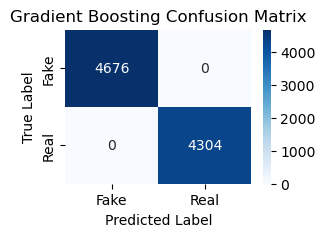

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data in X, y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert text data to count-based features using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Build the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_count)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {accuracy:.4f}')
print(f'Gradient Boosting Classification Report:\n{classification_report(y_test, y_pred)}\n')

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 5. RandomForestClassifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train_count, y_train)
pred_rfc = RFC.predict(X_test_count)

In [84]:
RFC.score(X_test_count, y_test)

0.9993318485523385

In [85]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4676
           1       1.00      1.00      1.00      4304

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# 6. Build the SVM model

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your data in X_train, X_test, y_train, y_test

# Convert text data to count-based features using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Build the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_count)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


# 7. Build the K-NN model

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your data in X_train, X_test, y_train, y_test

# Convert text data to count-based features using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Build the K-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_count)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


In [ ]:
print(classification_report(y_test, y_pred))

#  Generate and plot confusion matrix - TF-IDF

SVM Accuracy: 0.9972
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4676
           1       1.00      1.00      1.00      4304

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980




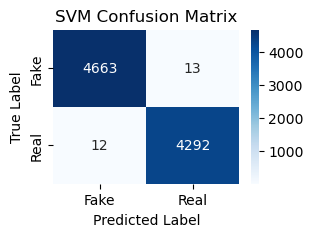

Random Forest Accuracy: 0.9994
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4676
           1       1.00      1.00      1.00      4304

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980




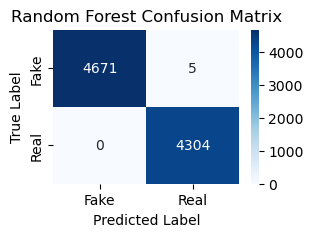

K-NN Accuracy: 0.8773
K-NN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      4676
           1       0.83      0.93      0.88      4304

    accuracy                           0.88      8980
   macro avg       0.88      0.88      0.88      8980
weighted avg       0.88      0.88      0.88      8980




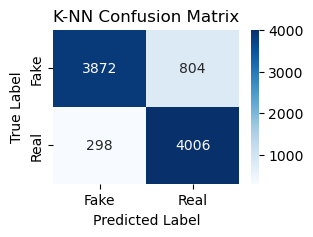

Logistic Regression Accuracy: 0.9928
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4676
           1       0.99      0.99      0.99      4304

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980




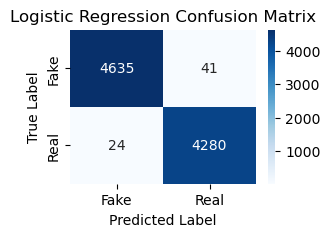

Naive Bayes Accuracy: 0.9419
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4676
           1       0.94      0.94      0.94      4304

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980




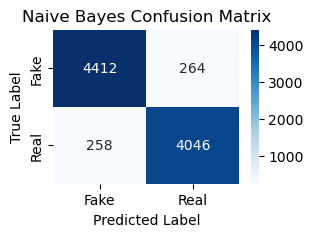

Decision Tree Accuracy: 0.9965
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4676
           1       1.00      0.99      1.00      4304

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980




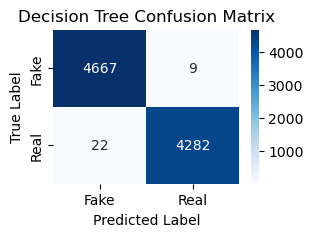

Gradient Boosting Accuracy: 1.0000
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4676
           1       1.00      1.00      1.00      4304

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980




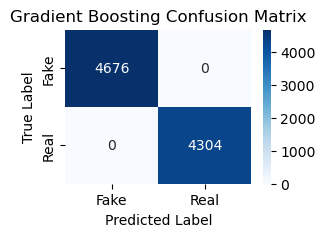

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data in X, y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Choose machine learning models
models = {
    'SVM': SVC(kernel='linear', C=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    # Print accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'{name} Classification Report:\n{classification_report(y_test, y_pred)}\n')
    
    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Generate and plot confusion matrix - CountVectorizer

SVM Accuracy: 0.9990
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4676
           1       1.00      1.00      1.00      4304

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980




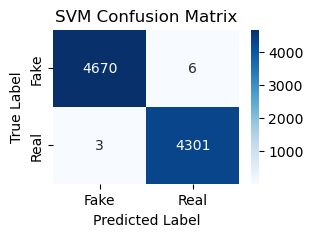

Random Forest Accuracy: 0.9991
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4676
           1       1.00      1.00      1.00      4304

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980




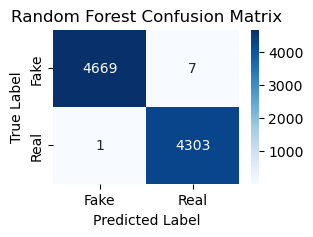

K-NN Accuracy: 0.7968
K-NN Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      4676
           1       0.82      0.74      0.78      4304

    accuracy                           0.80      8980
   macro avg       0.80      0.79      0.80      8980
weighted avg       0.80      0.80      0.80      8980




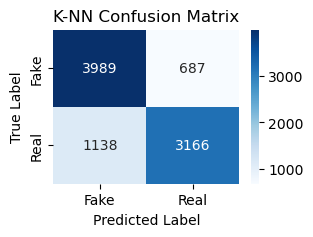

Logistic Regression Accuracy: 0.9982
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4676
           1       1.00      1.00      1.00      4304

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980




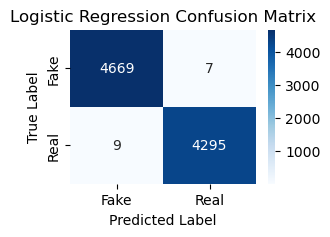

Naive Bayes Accuracy: 0.9617
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4676
           1       0.95      0.97      0.96      4304

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980




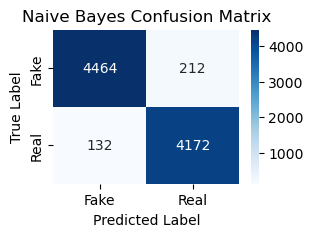

Decision Tree Accuracy: 0.9979
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4676
           1       1.00      1.00      1.00      4304

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980




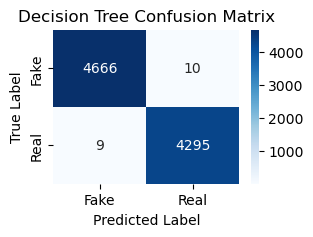

Gradient Boosting Accuracy: 1.0000
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4676
           1       1.00      1.00      1.00      4304

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980




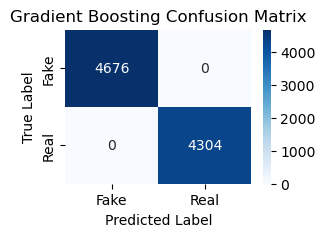

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data in X, y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert text data to count-based features using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Choose machine learning models
models = {
    'SVM': SVC(kernel='linear', C=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_count, y_train)
    y_pred = model.predict(X_test_count)
    
    # Print accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'{name} Classification Report:\n{classification_report(y_test, y_pred)}\n')
    
    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [88]:
# ... (previous code)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Assuming you have your data and labels
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))
print("Number of samples in X_test:", len(X_test))
print("Number of samples in y_test:", len(y_test))

# Assuming you have your TF-IDF vectorizer

# ... (remaining code)


Number of samples in X_train: 35918
Number of samples in y_train: 35918
Number of samples in X_test: 8980
Number of samples in y_test: 8980


# Plot ROC curve TF-IDF

# Logistic Regression model

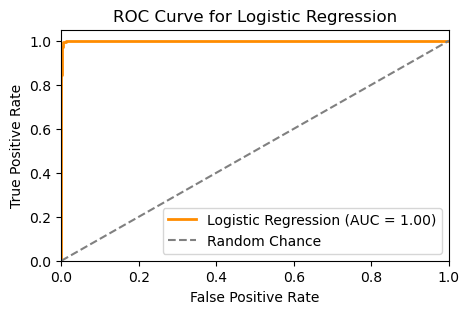

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and fit the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

# Get predicted probabilities for the positive class
y_score = logreg_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


# Multinomial Naive Bayes model

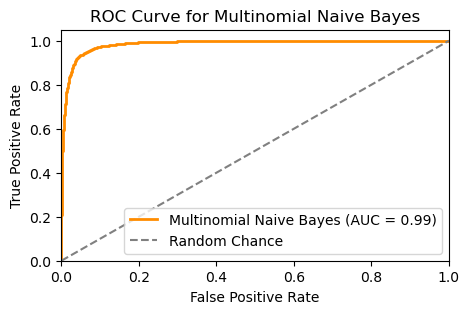

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and fit the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Get predicted probabilities for the positive class
y_score = nb_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Multinomial Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial Naive Bayes')
plt.legend(loc='lower right')
plt.show()


# Random Forest model

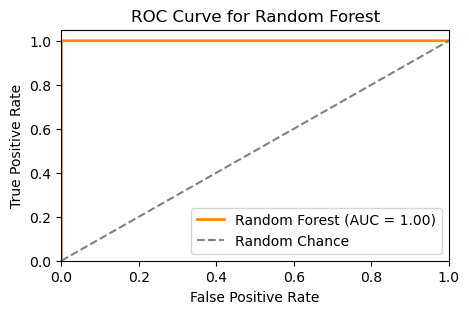

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and fit the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

# Get predicted probabilities for the positive class
y_score = rf_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()


# Decision Tree model

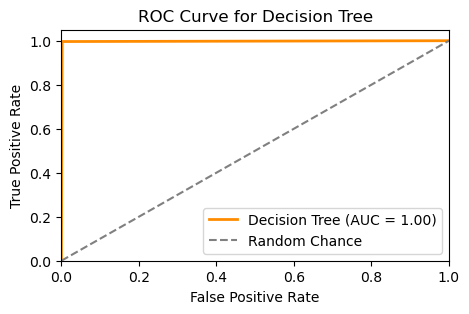

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_tfidf, y_train)

# Get predicted probabilities for the positive class
y_score = dt_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


# Support Vector Machine (SVM) model

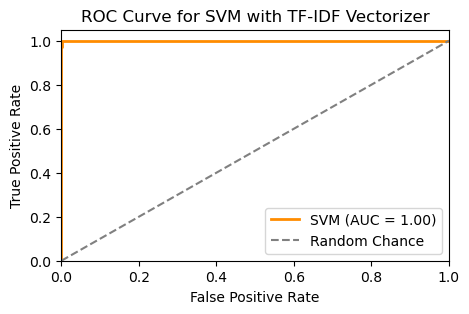

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and fit the Support Vector Machine (SVM) model
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Get predicted probabilities for the positive class
y_score = svm_model.predict_proba(X_test_tfidf)[:, 1]

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=list(set(y_test)))

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM with TF-IDF Vectorizer')
plt.legend(loc='lower right')
plt.show()


# K-Nearest Neighbors (KNN) model

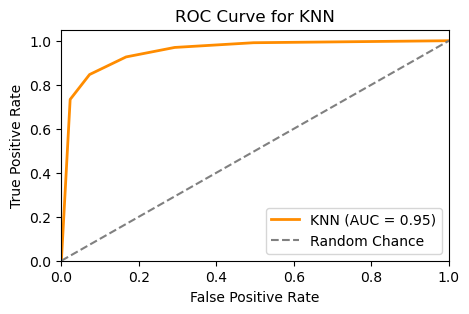

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and fit the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, y_train)

# Get predicted probabilities for the positive class
y_score = knn_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()


# Gradient Boosting model

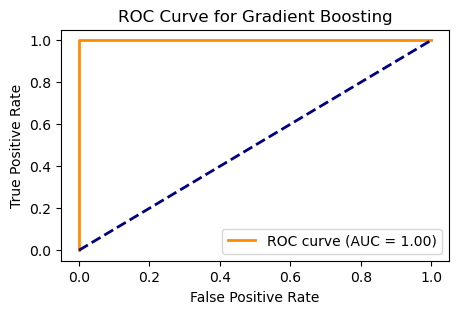

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Assuming you have trained your Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_tfidf, y_train)

# Get predicted probabilities for the positive class
y_probs = gradient_boosting_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


# ROC curve and AUC Count Vectorizer

# Logistic Regression model

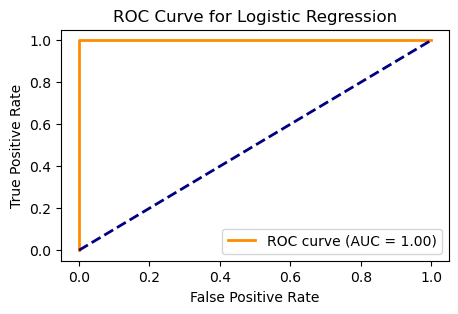

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Assuming you have trained your Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_count, y_train)

# Get predicted probabilities for the positive class
y_probs = logistic_regression_model.predict_proba(X_test_count)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


# Decision Tree model

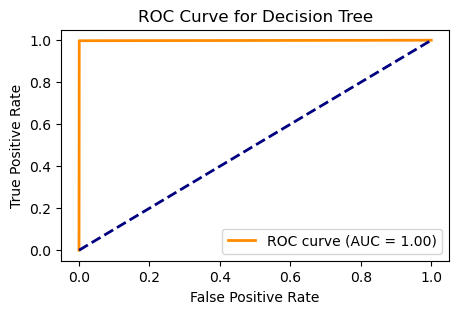

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Assuming you have trained your Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_count, y_train)

# Get predicted probabilities for the positive class
y_probs = decision_tree_model.predict_proba(X_test_count)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


# Random Forest model

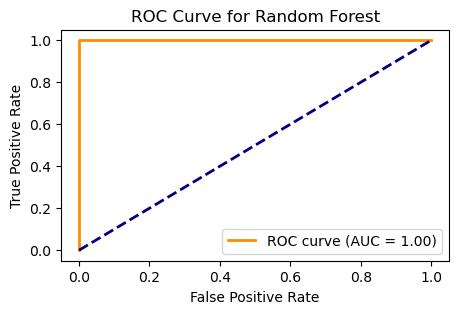

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Assuming you have trained your Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_count, y_train)

# Get predicted probabilities for the positive class
y_probs = random_forest_model.predict_proba(X_test_count)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()


# Naive Bayes model

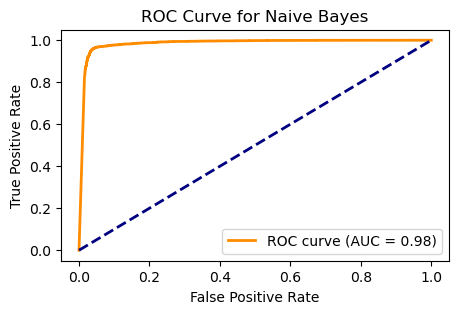

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Assuming you have trained your Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_count, y_train)

# Get predicted probabilities for the positive class
y_probs = naive_bayes_model.predict_proba(X_test_count)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()


# Gradient Boosting model

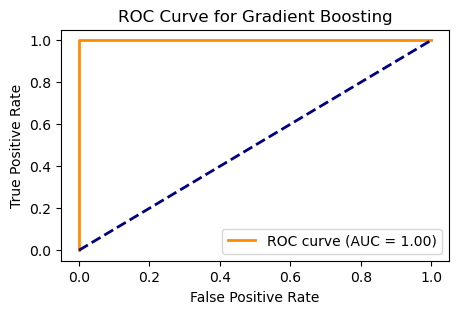

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Assuming you have trained your Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_count, y_train)

# Get predicted probabilities for the positive class
y_probs = gradient_boosting_model.predict_proba(X_test_count)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


# SVM model

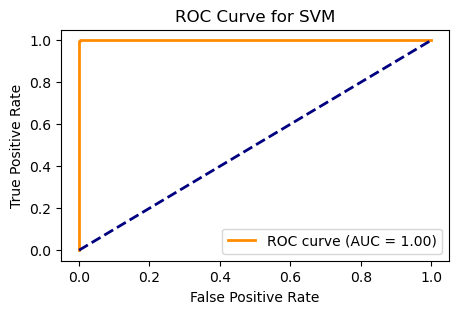

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Assuming you have trained your SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_count, y_train)

# Get predicted probabilities for the positive class
y_probs = svm_model.predict_proba(X_test_count)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()


# KNN model

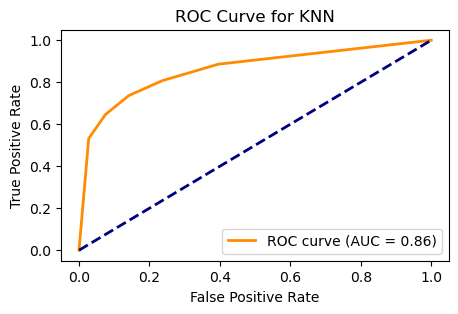

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have your Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Assuming you have trained your KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_count, y_train)

# Get predicted probabilities for the positive class
y_probs = knn_model.predict_proba(X_test_count)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()


In [ ]:
'SVM': SVC(kernel='linear', C=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting

# Spelling Correction

In [ ]:
import pandas as pd
from spellchecker import SpellChecker

# Assuming you have a DataFrame named 'data' with a 'text' column

def correct_spellings(text):
    spell = SpellChecker()
    corrected_text = []

    misspelled_words = spell.unknown(text.split())

    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)

    return " ".join(corrected_text)

# Apply the correct_spellings function to the 'text' column
data['text'] = data['text'].apply(correct_spellings)

# Display the updated DataFrame
print(data.head())
